# São Paulo Metro - Origin-destination survey

This survey was (...).

In [379]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csvkit

## Part 1: simple data analysis

For a controlled approach, let's ask ourselves some questions based on what variables we have. Then let's try to answer these questions and see if we can extract something else while answering them.

I'm not going to ask questions like "what is the mean age of the participants?" but rather "how age correlates to mode of transport in São Paulo?", "how time of departure from origin correlates to household income?" and anything else that crosses my mind.

    
## Part 2: `NetworkX` analysis

We have the participants' house, work and/or study location. Let's consider each of them a node and the transport between them edges. Then, let's apply some simple network measures and see if anything interest comes up.



_________

Let's start with the obvious and import the data. Originally the database is in .dbf file. In order to work easily with it, you can use `in2csv` to convert to .csv. You can read more about it [here](https://csvkit.readthedocs.io/en/latest/scripts/in2csv.html). 

In [11]:
OD_2017 = pd.read_csv('Banco de dados\OD_2017.csv')

<>:1: DeprecationWarning: invalid escape sequence \O
<>:1: DeprecationWarning: invalid escape sequence \O
<>:1: DeprecationWarning: invalid escape sequence \O
<ipython-input-11-e9fa956518f0>:1: DeprecationWarning: invalid escape sequence \O


Let's also build reference tables for the zones and municipalities cited by our survey participants.

In [337]:
zonas = pd.read_csv(r'Banco de dados\zonas.csv', encoding='utf8', sep=';')
munis = pd.read_csv(r'Banco de dados\muni.csv', encoding='utf8', sep=';')

## Part 1: simple data analysis

### Who utilizes the Metro of São Paulo? How one mode of transport compares to another?

Because of the survey design, not every house selected utilizes the Metro. But who are those that does? We have a variable called `modo`, which tells us the mode of transport utilized by the respondant. There are four variables `modo`: `modo1`, `modo2`, `modo3` and `modo4`. Each in respect to the travel number done by the respondent. At least one of them must have as answer `01 - Metrô`, as the layout indicates.

Let's query those that have answered 01 - Metro and name a new dataframe to store this group.

In [401]:
metro_users = OD_2017.query('modo1 == 1 or modo2 == 1 or modo3 == 1 or modo4 == 1')
cptm_users = OD_2017.query('modo1 == 2 or modo2 == 2 or modo3 == 2 or modo4 == 2')
bus_users = OD_2017.query('modo1 == 4 or modo2 == 4 or modo3 == 4 or modo4 == 4 or modo1 == 5 or modo2 == 5 or modo3 == 5 or modo4 == 5 or modo1 == 6 or modo2 == 6 or modo3 == 6 or modo4 == 6')
car_users = OD_2017.query('modo1 == 9 or modo2 == 9 or modo3 == 9 or modo4 == 9')
bike_users = OD_2017.query('modo1 == 15 or modo2 == 15 or modo3 == 15 or modo4 == 15')

<function matplotlib.pyplot.show(*args, **kw)>

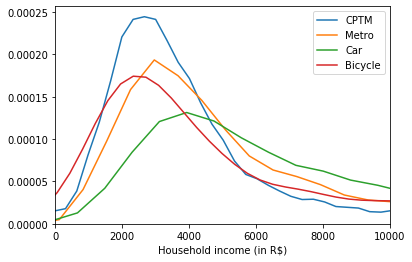

In [413]:
sns.distplot(cptm_users.renda_fa, label = 'CPTM', hist=False)
sns.distplot(metro_users.renda_fa, label = 'Metro', hist=False)
# sns.distplot(bus_users.renda_fa, label = 'Bus', hist=False)
sns.distplot(car_users.renda_fa, label = 'Car', hist=False)
sns.distplot(bike_users.renda_fa, label = 'Bicycle', hist=False)
plt.xlim(0, 10000);
plt.legend();
plt.xlabel('Household income (in R$)')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

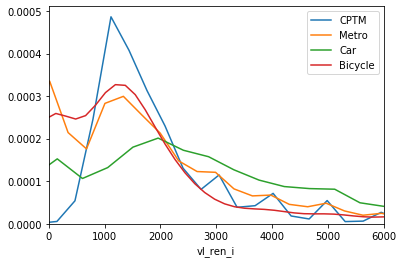

In [411]:
comp = 'vl_ren_i'

sns.distplot(cptm_users[comp], label = 'CPTM', hist=False)
sns.distplot(metro_users[comp], label = 'Metro', hist=False)
# sns.distplot(bus_users[comp], label = 'Bus', hist=False)
sns.distplot(car_users[comp], label = 'Car', hist=False)
sns.distplot(bike_users[comp], label = 'Bicycle', hist=False)
plt.xlim(0, 6000);
plt.legend();
plt.show